__Autor: Pablo Veloz M.__
## Desafío - SVM

__Descripción__
- Para esta sesión trabajaremos con la base de datos sobre cáncer mamario de Wisconsin. El objetivo es desarrollar un Clasificador mediante Máquinas de Soporte de Vectores que predica de forma adecuada en base a una serie de atributos sobre la composición del núcleo de una célula mamaria.
- Para más detalles técnicos asociados a la base de datos, pueden hacer click en el link.

__Ejercicio 1: Preparar el ambiente de trabajo__
- Importe todas las librerías a utilizar.
- Fije los parámetros de los gráficos con plt.Rcparams .
- Excluya las columnas id y Unnamed: 32 de la base de datos.
- Recodifique el vector objetivo diagnosis a numérico para poder procesarlo posteriormente.

In [146]:
import aux_funciones as auxiliares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer

warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(10, 6)

In [147]:
df = pd.read_csv('Archivo para desafío/breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [148]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [149]:
df = df.drop(columns=['id', 'Unnamed: 32'])
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


__Ejercicio 2: Visualizando la distribución de los atributos__
- Para cada uno de los atributos, grafique los histogramas condicional a cada clase del vector objetivo.
- Agregue las medias correspondientes y reporte a grandes rasgos cuáles son los atributos con una mayor similitud en la distribución.

In [150]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

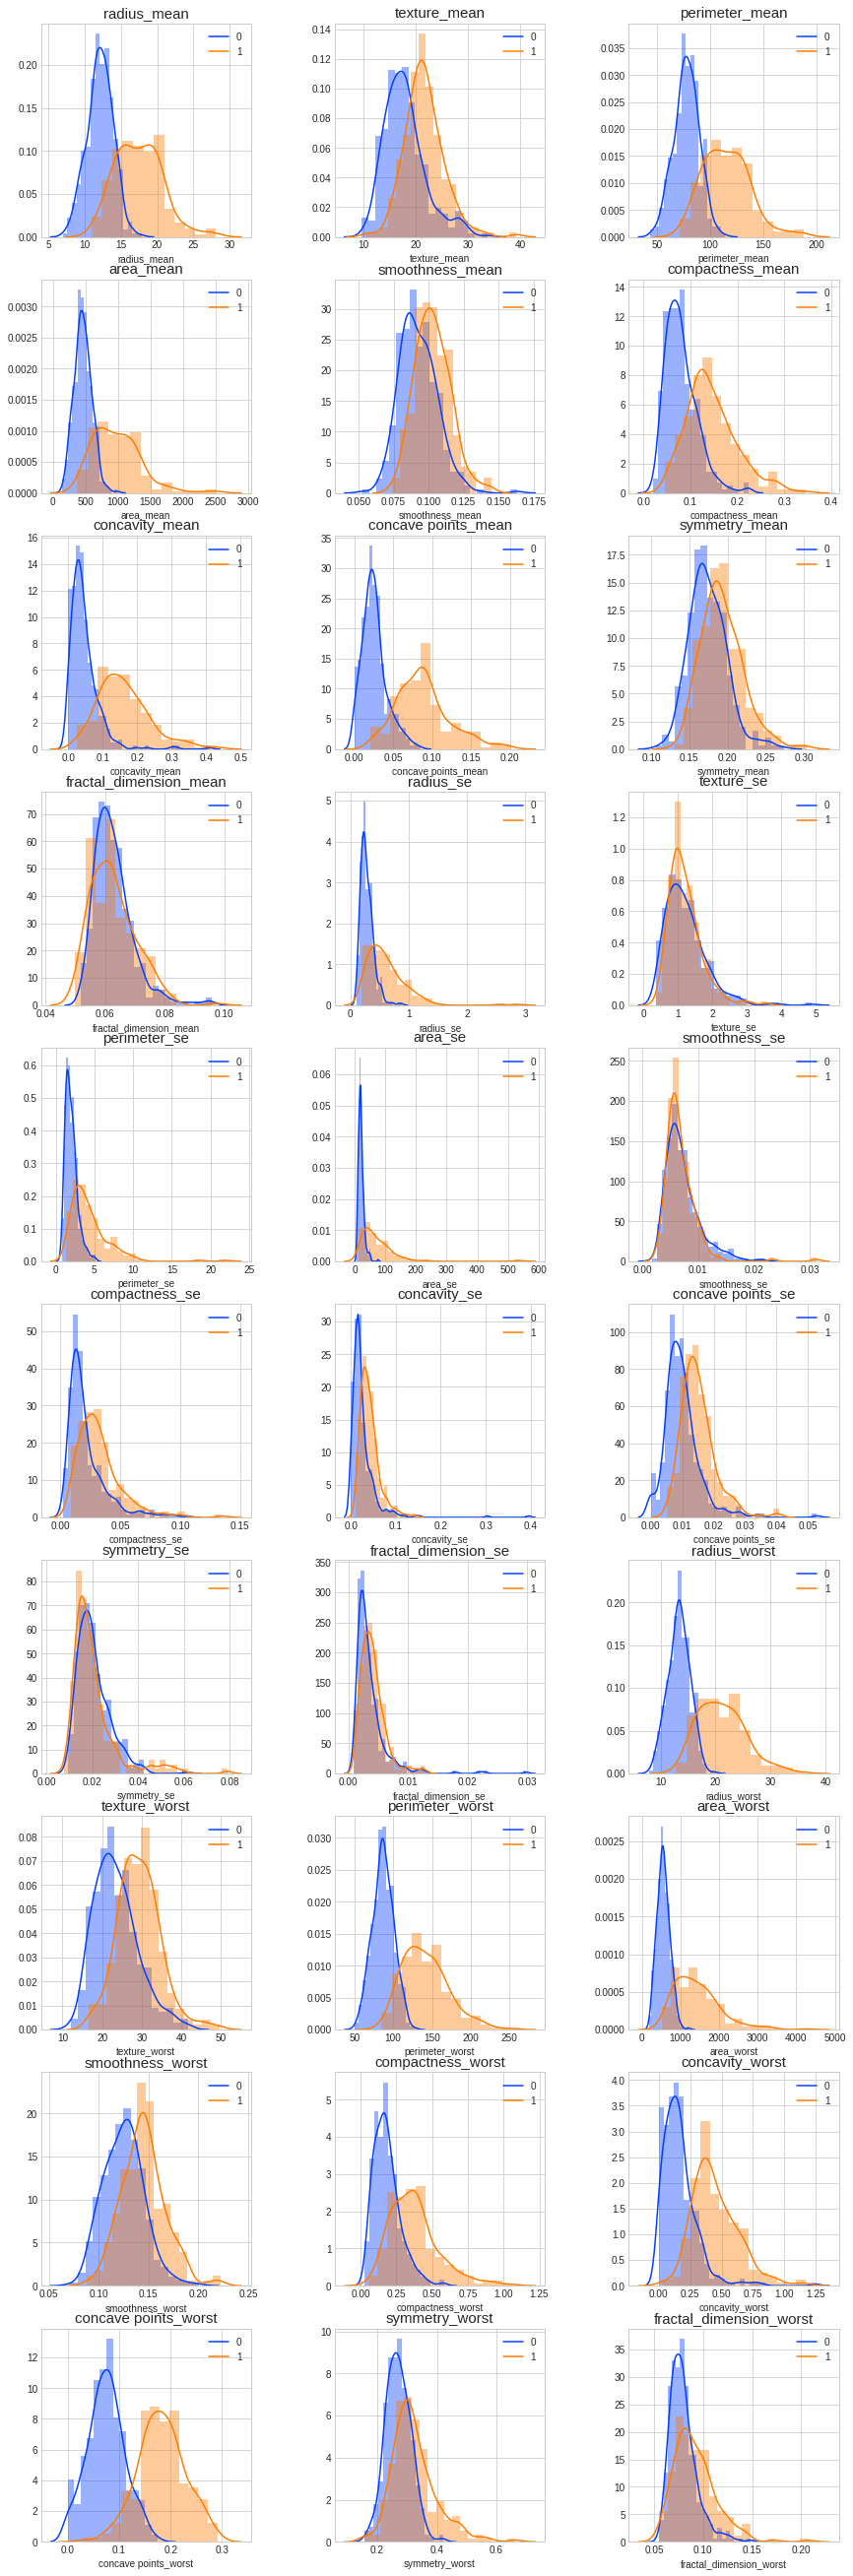

In [151]:
auxiliares.distplot_target_sep(df,df.columns,"diagnosis",(10,3),(6,4))

- Los atributos con distribuciones similares:
    - fractal_dimension_se
    - smoothness_se 
    - fractal_dimension_mean 
    - symmetry_se 
    - texture_se 
    - compactness_se 
    - smoothness_mean
    - concave points_se 
    - fractal_dimension_worst

__Ejercicio 3: Estimando el porcentaje de overlap en los atributos__
- Parte de las virtudes de las Máquinas de Soporte Vectorial es la capacidad de lidiar con clases no separables mediante el proceso de kernelización. Resulta que un aspecto importante que muchas veces se obvía es medir la noseparabilidad de los atributos, condicional a cada clase del vector objetivo.
- El procedimiento para estimar el rango de noseparabilidad entre clases se implementa en Python de la siguiente manera:

In [152]:
def histogram_overlap(df, attribute, target, perc=100):
    # get lower bound
    empirical_lower_bound = np.floor(df[attribute].min())
    # get upper bound
    empirical_upper_bound = np.ceil(df[attribute].max())
    # preserve histograms
    tmp_hist_holder = dict()
    # for each target class
    for unique_value in np.unique(df[target]):
    # get histogram
        tmp, _ = np.histogram(
        # for a specific attribute
        df[df[target] == unique_value][attribute],
        # define percentage
        bins=perc,
        # limit empirical range for comparison
        range=[empirical_lower_bound, empirical_upper_bound])
        # append to dict
        tmp_hist_holder["h_"+str(unique_value)] = tmp
    get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_0"])
    intersection = np.true_divide(np.sum(get_minima),
    np.sum(tmp_hist_holder["h_0"]))
    return intersection

- La intersección devolverá el porcentaje de comunalidad entre ambas clases, donde mayores niveles indican una mayor comunalidad.
- Utilizando la función, genere un dataframe donde almacenará el nombre del atributo y su porcentaje. Ordene este dataframe de forma descendente y preserve.

In [153]:
overlaps = []
names=[]
var=df.columns[1:]
for i,n in enumerate(var):
    overlaps.append(histogram_overlap(df, n, 'diagnosis'))
    names.append(n)
data={"Variable":names,"overlap":overlaps}
df_overlaps=pd.DataFrame.from_dict(data)
df_overlaps.sort_values(by='overlap', ascending=False).reset_index(drop=True)

,Variable,overlap
0,fractal_dimension_se,0.593838
1,smoothness_se,0.591036
2,fractal_dimension_mean,0.588235
3,symmetry_se,0.568627
4,texture_se,0.549020
5,compactness_se,0.523810
6,smoothness_mean,0.521008
7,symmetry_mean,0.509804
8,concave points_se,0.507003
9,fractal_dimension_worst,0.492997


__Ejercicio 4: Selección del modelo por GridSearchCV__
- Entrene una serie de modelos SVC con los siguientes hiperparámetros:
- C: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] .
- gamma: [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10] .
- Validaciones cruzadas: 10.
- Genere un heatmap en base a los puntajes estimados con GridSearchCV .
- tip: Vea cómo acceder a la llave mean_test_score en el diccionario cv_results_ .

__Digresión:__ Un par de elementos a considerar en la implementación de GridSearchCV
- Si trabajamos con sklearn.model_selection.GridSearchCV , tan solo haciendo la división en dos muestras es suficiente, incorporando los conjuntos X_train y y_train a nuestro objeto instanciado y preservando X_test e y_test como una muestra de validación externa.
- Si tenemos un archivo de testing externo, se recomienda no hacer división.
- El objeto creado con sklearn.model_selection.GridSearchCV sigue la misma funcionalidad de cualquier método de estimación de scikit-learn , con los pasos de Instanciar y Entrenar. Este objeto tendrá muchos elementos a considerar:
- sklearn.model_selection.GridSearchCV.cv_results_ devolverá un diccionario donde las llaves representarán distintas métricas y los valores representarán el desempeño de cada modelo:
- split* Indicará la métrica específica en cada validacieon cruzada y combinación de hiperparámetros. *_time Indicará el tiempo de ejecución en cada modelo.
- Por lo general trabajaremos con mean_test_score y mean_train_score que representa la media de CV para cada combinación de hiperparámetros.
- sklearn.model_selection.GridSearchCV.best_estimator_ devuelve un modelo listo para entrenar con la mejor combinación de hiperparámetros.
- sklearn.model_selection.GridSearchCV.best_score_ devuelve el desempeño promedio del modelo en el testing interno. Si es un problema de clasificación devolverá Accuracy , si es un problema de regresión devolverá MSE .

__Importando librerias__

In [154]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

__Test split__

In [155]:
df2=df.copy()
y_vec=df2['diagnosis']
X_mat=df2.drop('diagnosis',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X_mat,y_vec,test_size=0.33,random_state=1)

In [156]:
X_train.shape

(381, 30)

__Estandarizando__

In [157]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

__Modelo SVC__

In [158]:
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'gamma': [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10],}

estimate_cv = GridSearchCV(SVC(kernel='rbf'), params, cv=10)
estimate_cv_result = estimate_cv.fit(X_train, y_train)


__Heatmap__

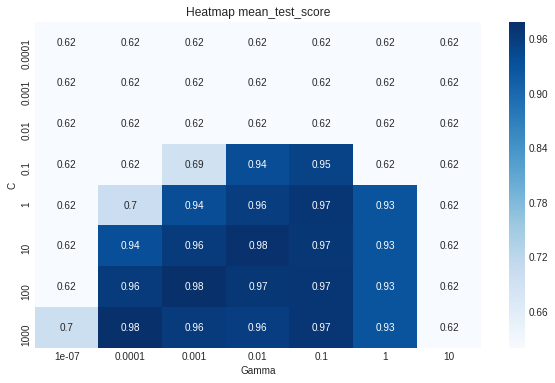

In [177]:
rows = len(params['C'])
cols = len(params['gamma'])
cv_params = estimate_cv_result.cv_results_['mean_test_score'].reshape(rows, cols)
sns.heatmap(cv_params, annot=True, xticklabels=params['gamma'], yticklabels=params['C'], cmap='Blues');
plt.xlabel('Gamma');
plt.ylabel('C');
plt.title('Heatmap mean_test_score');

__Hiperparametros__

In [160]:
best_estimator = estimate_cv_result.best_estimator_
best_C = best_estimator.C
best_Gamma = best_estimator.gamma
best_score=estimate_cv_result.best_score_
print('La mejor combinación de hiperparámetros es C = {} , Gamma = {},score={}'.format(best_C, best_Gamma,best_score))

La mejor combinación de hiperparámetros es C = 1000 , Gamma = 0.0001,score=0.984251968503937


- Reporte en qué rango de cada hiperparámetro el modelo presenta un desempeño eficiente.
    - Para $\gamma=[0.0001-0.1]$ y $C=[10-1000]$ 
- Reporte la mejor combinación de hiperparámetros y el desempeño en la muestra de entrenamiento.
    - Para $(\gamma,C)=(0.001,100)$ 

__Ejercicio 5: Validación del modelo en el hold-out sample__
- Genere las predicciones del hold-out sample en base a la mejor combinación de hiperparámetros. 
- Genere un reporte con las métricas de desempeño clásicas para los modelos de clasificación. 
- Comente en qué casos el modelo presenta un desempeño deficiente

In [181]:
print('Modelo No Depurado')
y_hat = best_estimator.predict(X_test)
print(classification_report(y_test, y_hat))

Modelo No Depurado
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       121
           1       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



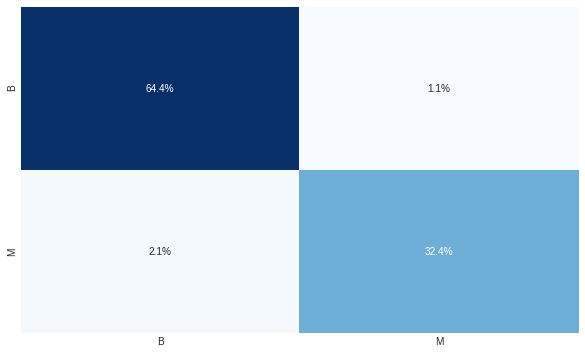

In [162]:
auxiliares.matriz_confusion(y_test,y_hat,["B","M"])

__Ejercicio (opcional): Depuración de atributos__
- Reentrene el modelo en función de los atributos que presenten un coeficiente de overlap menor a .45.
- Reporte el desempeño del modelo y comente sobre los nuevos hiperparámetros estimados, así como su desempeño en comparación al modelo del ejercicio 5.

In [163]:
df_depurado=df_overlaps.sort_values(by='overlap', ascending=False).reset_index(drop=True)

__overlap menor a .45__

In [164]:
df_depurado=df_depurado[df_depurado["overlap"]<0.45]

In [165]:
df_depurado.Variable

12          symmetry_worst
13            texture_mean
14           texture_worst
15        compactness_mean
16       compactness_worst
17            perimeter_se
18               radius_se
19         concavity_worst
20                 area_se
21             radius_mean
22          concavity_mean
23               area_mean
24          perimeter_mean
25    concave points_worst
26     concave points_mean
27            radius_worst
28         perimeter_worst
29              area_worst
Name: Variable, dtype: object

In [166]:
df3=df.copy()
df3=df3.loc[:,df_depurado.Variable]
df3["diagnosis"]=df["diagnosis"]
#y_vec=df['diagnosis']
#X_mat=df3
#X_train,X_test,y_train,y_test=train_test_split(X_mat,y_vec,test_size=0.33,random_state=1)

In [167]:
df3.head()

,symmetry_worst,texture_mean,texture_worst,compactness_mean,compactness_worst,perimeter_se,radius_se,concavity_worst,area_se,radius_mean,concavity_mean,area_mean,perimeter_mean,concave points_worst,concave points_mean,radius_worst,perimeter_worst,area_worst,diagnosis
0,0.4601,10.38,17.33,0.27760,0.6656,8.589,1.0950,0.7119,153.40,17.99,0.3001,1001.0,122.80,0.2654,0.14710,25.38,184.60,2019.0,1
1,0.2750,17.77,23.41,0.07864,0.1866,3.398,0.5435,0.2416,74.08,20.57,0.0869,1326.0,132.90,0.1860,0.07017,24.99,158.80,1956.0,1
2,0.3613,21.25,25.53,0.15990,0.4245,4.585,0.7456,0.4504,94.03,19.69,0.1974,1203.0,130.00,0.2430,0.12790,23.57,152.50,1709.0,1
3,0.6638,20.38,26.50,0.28390,0.8663,3.445,0.4956,0.6869,27.23,11.42,0.2414,386.1,77.58,0.2575,0.10520,14.91,98.87,567.7,1
4,0.2364,14.34,16.67,0.13280,0.2050,5.438,0.7572,0.4000,94.44,20.29,0.1980,1297.0,135.10,0.1625,0.10430,22.54,152.20,1575.0,1


In [168]:
df3['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

In [169]:
df3.head()

,symmetry_worst,texture_mean,texture_worst,compactness_mean,compactness_worst,perimeter_se,radius_se,concavity_worst,area_se,radius_mean,concavity_mean,area_mean,perimeter_mean,concave points_worst,concave points_mean,radius_worst,perimeter_worst,area_worst,diagnosis
0,0.4601,10.38,17.33,0.27760,0.6656,8.589,1.0950,0.7119,153.40,17.99,0.3001,1001.0,122.80,0.2654,0.14710,25.38,184.60,2019.0,1
1,0.2750,17.77,23.41,0.07864,0.1866,3.398,0.5435,0.2416,74.08,20.57,0.0869,1326.0,132.90,0.1860,0.07017,24.99,158.80,1956.0,1
2,0.3613,21.25,25.53,0.15990,0.4245,4.585,0.7456,0.4504,94.03,19.69,0.1974,1203.0,130.00,0.2430,0.12790,23.57,152.50,1709.0,1
3,0.6638,20.38,26.50,0.28390,0.8663,3.445,0.4956,0.6869,27.23,11.42,0.2414,386.1,77.58,0.2575,0.10520,14.91,98.87,567.7,1
4,0.2364,14.34,16.67,0.13280,0.2050,5.438,0.7572,0.4000,94.44,20.29,0.1980,1297.0,135.10,0.1625,0.10430,22.54,152.20,1575.0,1


In [170]:
y_vec=df3['diagnosis']
X_mat=df3.drop('diagnosis',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X_mat,y_vec,test_size=0.33,random_state=11)

In [172]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [173]:
estimate_cv = GridSearchCV(SVC(kernel='rbf'), params, cv=10)
estimate_cv_result = estimate_cv.fit(X_train, y_train)

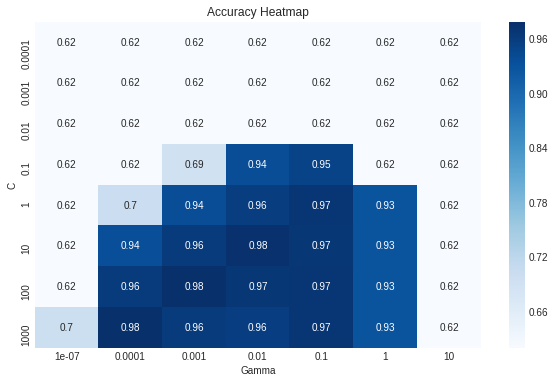

In [174]:
rows = len(params['C'])
cols = len(params['gamma'])
cv_params = estimate_cv_result.cv_results_['mean_test_score'].reshape(rows, cols)
sns.heatmap(cv_params, annot=True, xticklabels=params['gamma'], yticklabels=params['C'], cmap='Blues');
plt.xlabel('Gamma');
plt.ylabel('C');
plt.title('Accuracy Heatmap');

__Hiperparámetros estimados__

In [184]:
best_estimator = estimate_cv_result.best_estimator_
best_C = best_estimator.C
best_Gamma = best_estimator.gamma
best_score=estimate_cv_result.best_score_
print('La mejor combinación de hiperparámetros es C = {} , Gamma = {},score={}'.format(best_C, best_Gamma,best_score))
#print('Modelo: X_train')
#y_hat = best_estimator.predict(X_train)
#print(classification_report(y_train, y_hat))

La mejor combinación de hiperparámetros es C = 100 , Gamma = 0.001,score=0.979002624671916


In [182]:
print('Modelo Depurado')
y_hat = best_estimator.predict(X_test)
print(classification_report(y_test, y_hat))

Modelo Depurado
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       121
           1       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



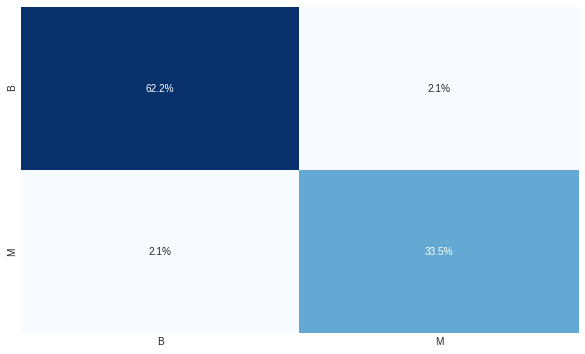

In [183]:
auxiliares.matriz_confusion(y_test,y_hat,["B","M"])

__Análisis__
- Los modelos utilizan diferentes valores de C , $\gamma$ y best_scores.
    - Modelo Depurado $C=1000 , \gamma=0.0001$ y  best_score=0.984
    - Modelo No Depurado $C = 100 , \gamma = 0.001$ y  best_score=0.979

- Levemente el modelo no depurado genera mejores métricas en la clase 0, sin embargo para la clase 1(M-maligno),son similares. Este hecho se respalda, con la matrix de confusión de las clases estudiadas.